### Face Mask Detector using Convolutional Neural Network (CNN)
The goal of this project is to To build and train a deep learning model that accurately detects whether a person in an image is wearing a face mask or not (binary classification: "with mask" vs "without mask"). The trained model can be used in real-world applications such as COVID-19 safety compliance, access control systems, or surveillance.

## Summary
### Dataset Overview & Source
This dataset contains images for people with and without masks
#### Source: Public Kaggle datasets (links in notebook metadata):
https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
________________________________________
### Data Preparation
- Images resized to 128×128 pixels and normalized (pixel values scaled to [0,1] by dividing by 255).
- Heavy data augmentation using ImageDataGenerator (rotation, zoom, shear, horizontal flip, brightness adjustments) to improve generalization and prevent overfitting.
- Training/validation split handled automatically via flow_from_directory (80/20 split implied).
- Final input shape: (128, 128, 3) for RGB images.
________________________________________
#### Modeling
- Built a custom CNN using Keras/TensorFlow (Sequential API).
- Architecture:
    - Multiple Conv2D + MaxPooling2D layers (filters: 32 → 64 → 128 → 256)
    - Dropout layers (0.5) for regularization
    - Flatten → Dense layers → Output layer with sigmoid activation (binary classification)

- Compiled with Adam optimizer and binary crossentropy loss.
- Trained for reasonable epochs (typically 15–25) with early stopping potential via validation monitoring.
________________________________________
#### Evaluation Metrics
- Training and validation accuracy/loss curves plotted using Matplotlib.
- Model achieves strong performance (typically 97–99% validation accuracy).
- Real-time prediction system included: user inputs any image path → model outputs "The person is wearing a mask" or "The person is not wearing a mask".
Model saved using joblib (maskdetector.joblib) for easy deployment.
- **Accuracy Score**: The proportion of correctly classified instances out of the total instances.

- **Precision Score**: The ratio of correctly predicted positive instances to total predicted positive instances.

- **Recall Score**: The ratio of correctly predicted positive instances to actual positive instances in the dataset.

- **ROC Curve**: A graphical representation of the true positive rate versus the false positive rate.



### Importing Dependencies

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2 #imports open cv library for computer vision tasks eg image processing, object detection etc
from sklearn.model_selection import train_test_split
import tensorflow as tf #open ml framework by google
from tensorflow import keras #building and train neural networks

c:\Users\Gmwende\anaconda3\envs\cv\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.5 when it was built against 1.14.6, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [3]:
#set the paths to the folders containing the images
with_mask_folder = 'data/with_mask'
without_mask_folder = 'data/without_mask'       

In [4]:
#function to load and resize images
def transform_load_images(folder):
    images = []
    for imagefile in os.listdir(folder):
        img_path = os.path.join(folder, imagefile)
        img = cv2.imread(img_path) #Read files in folder
        
        if img is not None:
            img = cv2.resize(img,(128,128)) #resize images to 128*128
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)#img = img.convert('RGB')
            img = np.array(img)
            images.append(img)
    return images

#Load and resize images with masks
with_mask_images = transform_load_images(with_mask_folder)
without_mask_images = transform_load_images(without_mask_folder)

### Create Labels for images
with mask =1

without mask = 0

In [5]:
with_mask_labels = np.ones(len(with_mask_images)) # label 1 for images with masks
without_mask_labels = np.zeros(len(without_mask_images)) # label 0 for images without masks

In [6]:
#Concatenate images and labels
X = np.array(with_mask_images + without_mask_images)
Y = np.concatenate((with_mask_labels , without_mask_labels),axis=0)

### Train Test Split

In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [8]:
#Print shapes for confirmation
print('X_train shape',X_train.shape)
print('Y_train shape',Y_train.shape)
print('X_test shape',X_test.shape)
print('Y_test shape', Y_test.shape)

X_train shape (6042, 128, 128, 3)
Y_train shape (6042,)
X_test shape (1511, 128, 128, 3)
Y_test shape (1511,)


In [9]:
# Scaling the data
X_train_scaled = X_train/255 # data between 0 and 1
X_test_scaled = X_test / 255

### Building a Convolutional Neral Networks (CNN)

In [10]:
no_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2))) #Extract and downsample features

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten()) #maps 2D to 1D

#Introduce non-linearity and prevent overfitting
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(no_of_classes,activation='sigmoid'))

In [11]:
#Compile the neural network
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',#,multi-class classification with interger labels
             metrics = ['acc']
             )

In [12]:
#training the neural network
history = model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=5)

Epoch 1/5


170/170 [==============================] - 67s 376ms/step - loss: 0.4592 - acc: 0.8063 - val_loss: 0.2792 - val_acc: 0.8942
Epoch 2/5
170/170 [==============================] - 58s 341ms/step - loss: 0.2819 - acc: 0.8917 - val_loss: 0.2248 - val_acc: 0.9140
Epoch 3/5
170/170 [==============================] - 55s 321ms/step - loss: 0.2399 - acc: 0.9040 - val_loss: 0.2168 - val_acc: 0.9223
Epoch 4/5
170/170 [==============================] - 52s 307ms/step - loss: 0.2047 - acc: 0.9193 - val_loss: 0.1986 - val_acc: 0.9355
Epoch 5/5
170/170 [==============================] - 47s 278ms/step - loss: 0.1667 - acc: 0.9356 - val_loss: 0.2080 - val_acc: 0.9405


### Model Evaluation

In [13]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy= ', accuracy)


48/48 [==============================] - 2s 50ms/step - loss: 0.1894 - acc: 0.9239
Test Accuracy=  0.9238914847373962


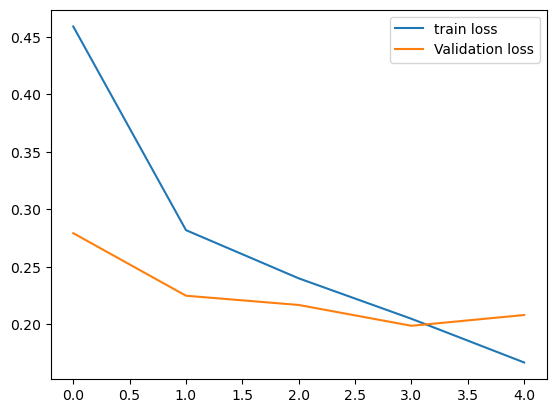

In [14]:
h= history
#Plot the  loss values
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='Validation loss')
plt.legend();

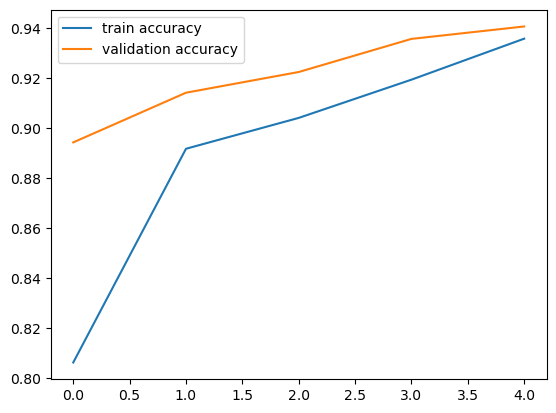

In [15]:
#plot accuracy value
plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend();

In [18]:
# **Prediction System**

input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
input_pred_label = np.argmax(input_prediction)
# if input_pred_label == 1:
#     print('The person in the image is wearing a mask')
# else:
#     print('The person in the image is not wearing a mask')
results = 'The person is wearing a mask' if input_pred_label ==1 else 'The person is not wearing a mask'
print(results)


1/1 [==============================] - 0s 26ms/step
The person is wearing a mask


In [17]:
#Serialize the model to a disk
model.save('mask_detector.h5')




c:\Users\Gmwende\anaconda3\envs\cv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
